# Fruit Classification using supervised learning algorithms

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importing the dataset

In [2]:
data = pd.read_csv('Fruit_data.csv')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [4]:
data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [5]:
print(data['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [6]:
print(data.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


## Visualising the data

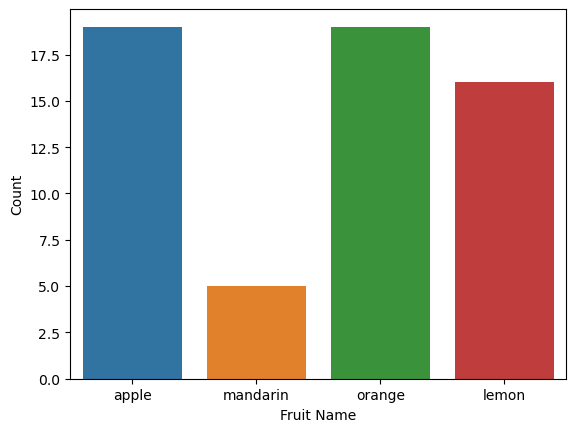

In [7]:
sns.countplot(x='fruit_name', data=data)
plt.xlabel('Fruit Name')
plt.ylabel('Count')
plt.show()

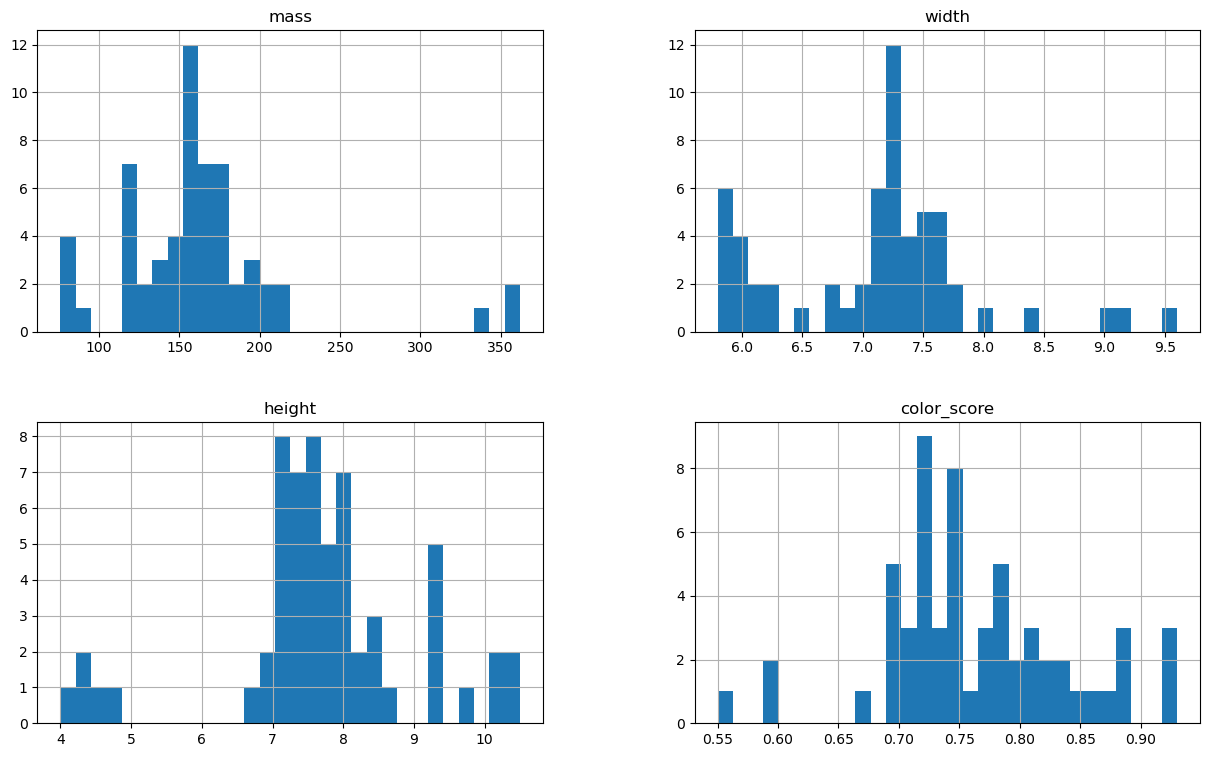

In [8]:
data.drop('fruit_label', axis=1).hist(bins=30, figsize=(15,9))
plt.show()

## Encoding the data

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['fruit_name'] = le.fit_transform(data['fruit_name'])
data['fruit_subtype'] = le.fit_transform(data['fruit_subtype'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     int64  
 2   fruit_subtype  59 non-null     int64  
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 3.4 KB


## Splitting the data

In [11]:
X = data.drop('fruit_label', axis=1)
y = data['fruit_label']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training using multiple classification algorithms

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [15]:
lr_model.score(X_test, y_test)

0.8333333333333334

In [16]:
lr_prediction = lr_model.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, lr_prediction)}")

Accuracy score: 0.8333333333333334


### Decision Trees 

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
dt_model.score(X_test, y_test)

1.0

In [19]:
dt_prediction = dt_model.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, dt_prediction)}")

Accuracy score: 1.0


### Random Forest 

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
rf_model.score(X_test, y_test)

1.0

In [22]:
rf_prediction = rf_model.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, rf_prediction)}")

Accuracy score: 1.0


### K Nearest Neighbours

In [23]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
kn_model.score(X_test, y_test)

1.0

In [25]:
kn_prediction = kn_model.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, kn_prediction)}")

Accuracy score: 1.0


### Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [27]:
nb_model.score(X_test, y_test)

1.0

In [28]:
nb_prediction = kn_model.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, nb_prediction)}")

Accuracy score: 1.0


### Support Vector Machine

In [29]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [30]:
svc_model.score(X_test, y_test)

1.0

In [31]:
svc_prediction = svc_model.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, svc_prediction)}")

Accuracy score: 1.0


In [32]:
# Classification report of KNN Algorithm
from sklearn.metrics import classification_report

pred = kn_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

